# **LA_07_2_Quadratic forms**

We consider only real matrices and euclidean spaces in this topic


#### **Qudratic forms**

**Definition.** Quadratic form is a function of vector argument $x= (x_1, \dots, x_n)$ given as a sum of quadratic monomials ($x_j^2, x_ix_j$) with some coefficients.

Quadratic form can be written down as $Q(x) = a_{11}x_1^2 +\dots +a_{nn}x_n^2 + \displaystyle\sum_{1\leq i<j\leq n} 2a_{ij}x_ix_j$

Also in a vector-matrix form it can be represented as $Q(x) =x^tSx$,
where $S = \begin{pmatrix} a_{11} & a_{12} & \dots & a_{1n} \\ a_{12} & a_{22} & \dots & a_{2n} \\   &  & \dots &  \\ a_{1n} & a_{2n} & \dots & a_{nn} \\  \end{pmatrix}$ is a symmetric matrix of coefficients. It is said to be a *matrix of quadratic form*.

*Example.* $Q(x) = (x_1\ x_2)\begin{pmatrix} a & b\\ b & c\end{pmatrix}\begin{pmatrix} x_1\\ x_2 \end{pmatrix} = ax_1^2+2bx_1x_2+cx_2^2.$



---

#### **Coding sample: draw the implicit plot of $Q(x)=1$ for quadratic form $Q(x)$**

Generated by AI

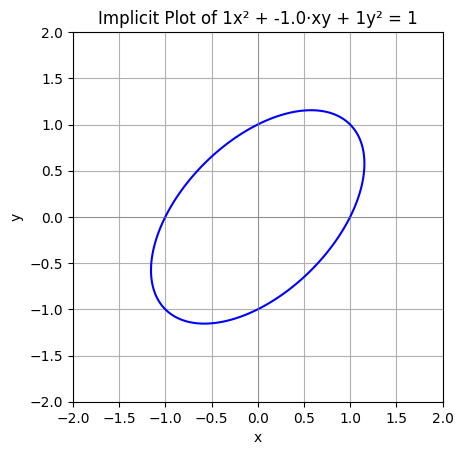

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the implicit equation: ax^2 + 2bxy + cy^2 = 1
a = 1
b = -0.5
c = 1

# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Compute the value of the quadratic form on the grid
Z = a*X**2 + 2*b*X*Y + c*Y**2

# Plot the contour where the equation equals 1
plt.contour(X, Y, Z, levels=[1], colors='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Implicit Plot of {a}x² + {2*b}·xy + {c}y² = 1')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()



---



#### **Change of basis**

If coordinates $x$ of a vector in a basis $e$ are changed to coordinates $y$ in some other basis $u$, then $x=Ty$  where $T$ is the transition matrix from $e$ to $u$.
Then $Q(x) = x^tSx = (Ty)^tS(Ty) = y^t(T^tST)y$ thus while changing the basis matrix $S$ is changed to $T^tST$. Note that $T^tST$ is symmetric as well.

*Example.* Consider the  linear transformation of coordinates $x_1=y_1+y_2, x_2=y_1-y_2$, where $x_1, x_2$ are given in the standard basis. Then $\begin{pmatrix} x_1\\ x_2 \end{pmatrix} = \begin{pmatrix} 1 & 1\\ 1 & -1 \end{pmatrix}\begin{pmatrix} y_1\\ y_2 \end{pmatrix}$ and thus $u_1=\begin{pmatrix} 1 \\ 1 \end{pmatrix}, u_2 = \begin{pmatrix} 1\\ -1 \end{pmatrix}$ is the new basis.
The quadratic form $Q(x)=x_1x_2$ changes to $Q(y) = y_1^2-y_2^2$ in new coordinates.



---

#### **Coding sample: change of basis in quadratic form**

In [9]:
import numpy as np

def change_of_basis_qf(A, T):
  '''
    Returns the matrix of the same quadratic form Q(x) = xᵗAx
    in a new basis defined by the change-of-basis matrix T.

    Parameters:
    A (np.ndarray): NxN symmetric matrix representing the quadratic form in the original basis.
    T (np.ndarray): NxN transition matrix whose columns are the new basis vectors expressed in the old basis.

    Returns:
    np.ndarray: Transformed matrix A' = Tᵗ A T '''
  return (T.T @ A) @ T

def calc_qf(A, x):
  '''returns the value of x^tAx for symmetric matrix A and a vector x

  Parameters:
  A (np.ndarray): NxN symmetric matrix representing the quadratic form
  x (np.ndarray): N-vector

  Returns:
  np.ndarray: x^tAx
  '''
  return (x.T @ A) @ x

x = np.array([2,3])
T = np.array([[1, 1], [0, 1]])  #transition matrix
A = np.array([[1, 2], [2, 1] ]) #should be symmetric

x_new = np.linalg.inv(T) @ x.T
A_new = change_of_basis_qf(A, T)
q_value_old = calc_qf(A, x)
q_value_new = calc_qf(A_new, x_new)

print(f'Vector in an old basis x = {x}, in a new basis x_new={x_new}')
print(f'Quadratic form value in an old basis {q_value_old}')
print(f'Quadratic form value in a new basis {q_value_new }')
print(f'If results are the same: {np.allclose(q_value_old, q_value_new)}')


Vector in an old basis x = [2 3], in a new basis x_new=[-1.  3.]
Quadratic form value in an old basis 37
Quadratic form value in a new basis 37.0
If results are the same: True




---



#### **Principal axes reduction**

Recall that every symmetric matrix $S$ can be diagonalized as $S=U\Lambda U^t$, where $\Lambda$ is a diagonal matrix with eigenvalues of $S$ as diagonal entries and $U$ is an orthogonal matrix, whose columns are the normalized eigenvectors of $S$.

 Considering $Q(x) =x^tSx$ with $S = U\Lambda U^t$ we get
$$Q(x) = x^t(U\Lambda U^t)x = (U^tx)^t \Lambda (U^tx) = y^t \Lambda y = \lambda_1y_1^2+\dots+\lambda_ny_n^2$$
with $y=U^tx$. Orthogonality of $U$ implies $U^t = U^{-1}$, thus $x=Uy$ is an orthogonal transformation of coordinates which transforms $Q$ to a sum of quadratic terms. This transformation is known as *principal axes reduction*.

**Theorem [principal axes theorem].** For every real quadratic form $Q(x)=x^tSx$ there exists an orthonormal basis $u$ of eigenvectors of $S$, in which $Q$ can be given as $Q(y) = \lambda_1y_1^2+\dots+\lambda_ny_n^2$ where $\lambda_j $ are the eigenvalues of $S$.

The principal axes reduction is a crucial point of [the theory of quadrics](https://en.wikipedia.org/wiki/Quadric), which allows to describe and to get the canonical equation for every curve or surface of the second order. The quadrics theory is not discussed in this course, but we will see the idea in the next example.

*Example.* Reduce the quadratic form $Q(x) = 5x_1^2+8x_1x_2 +5x_2^2$ to principal axes and investigate the geometrical properties of equation $Q(x)=1$.

The matix of $Q$ is $S = \begin{pmatrix} 5 & 4 \\ 4 & 5\end{pmatrix}$.

The characteristic polynomial is $\chi(\lambda) = \begin{vmatrix} 5-\lambda & 4 \\ 4 & 5-\lambda\end{vmatrix} = \lambda^2-10\lambda+9$.

The eigenvalues are $\lambda_1 =1, \lambda_2=9$.

The eigenspace $V_{\lambda_1}$ is the null-space of $\begin{pmatrix} 4 & 4 \\ 4 & 4\end{pmatrix}$, $V_{\lambda_1} = Lin(\begin{pmatrix} -1 \\ 1 \end{pmatrix})$. We will take the normalized vector $u_1 = \begin{pmatrix} -1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix}$ as the first vector of orthogonal basis.

The eigenspace $V_{\lambda_2}$ is the null-space of $\begin{pmatrix} -4 & 4 \\ 4 & -4\end{pmatrix}$, $V_{\lambda_2} = Lin(\begin{pmatrix} 1 \\ 1 \end{pmatrix})$. We will take the normalized vector $u_2 = \begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix}$ as the second vector of orthogonal basis.

Finally we get $S=U\Lambda U^t$ with $U =  \begin{pmatrix} -1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{pmatrix}$ and $\Lambda = \begin{pmatrix} 1 & 0 \\ 0 & 9 \end{pmatrix}$ and $Q(y)=y_1^2+9y_2^2$, where $y_1, y_2$ are coordinates in the orthonormal basis $u_1, u_2$.

Principal axes reduction of $Q$ allows us to understand what set of points is given by the equation $Q=1$.

$Q(y)=\dfrac{y_1^2}{1^2}+ \dfrac{y_2^2}{(1/3)^2}=1$ is an ellipse equation, with semi-axes $a=1$ and $b=1/3$ on the lines given by $u_1$ and $u_2$ vectors respectively.

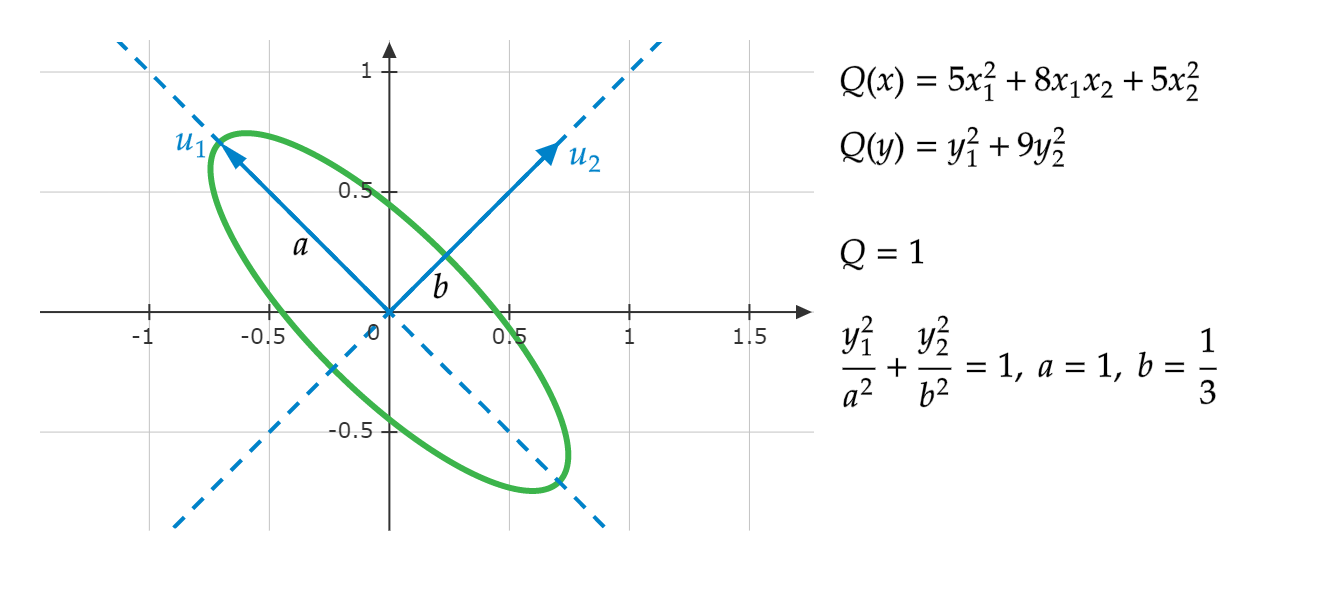

#### **Positive (and not only) definite quadratic forms and matrices**
Note that the the quadratic form $Q$ from the example above is a sum of positive squares and hence its values may be only positive for $x\ne 0$.

We will discuss the forms with positive (and also nonnegative and negative) values in this subsection.  

**Definition.** A quadratic form $Q(x)$ is said to be

1. *positive definite* if $Q(x)> 0$ for every $x\ne 0$ (notation $Q>0$);

2. *negative definite* if $Q(x)< 0$ for every $x\ne 0$ (notation $Q< 0$);

3. *positive semi-definite* if $Q(x\geq 0)$ for every $x$ (notation $Q\geq 0$).

A symmetric matrix $S$ is said to be positive definite (negative definite, positive semi-definite) if so is its quadratic form $Q(x)=x^tSx$.

The sign definite matrices are of the great importance in various applications. There are number of criteria of sign definitiness.

**Theorem [on positive definite matrices].** Let $Q(x)=x^tSx$ be a (real) quadratic form with symmetric matrix $S$. The following statements are equivalent:

1. $Q>0$.

2. All eigenvalues $\lambda_1, \dots, \lambda_n$ of $S$ are positive.

3. There exists a matrix $A$ (not necessarily square) with linearly independent columns, such as $S=A^tA$, i.e. $S$ is a Gram matrix for some linearly independent system of vectors.

4. **Sylvester's criterion.** All leading principal minors $\Delta_1, \Delta_2, \dots, \Delta_n$ of $S$ are positive. A *leading principal minor* $\Delta_k$ of $S$ is the determinant of its upper-left  $k\times k$ sub-matrix.

5. All the pivots $l_1, \dots, l_n$ of Gaussian elimination steps are positive. Note that Gaussian elimination in this case should be done by row transformations $J-aI$, where $J>I$ are the row numbers, and $a$ is an appropriate scalar.

The similar criteria hold for negative definite and positive semi-definite matrices

|criterion ||$Q< 0$|| $Q>=0$|
|----------||----- || -------|
|eigenvalues||$\lambda_1, \dots, \lambda_n< 0 $||$\lambda_1, \dots, \lambda_n\geq 0$|
|Gram||  || $S=A^tA$|
|Sylvester|| $\Delta_1< 0, \Delta_2>0, \dots, (-1)^n\Delta_n>0$ || $\Delta_1,\dots, \Delta_n\geq 0$|
|pivots|| $l_1, \dots, l_n< 0$ || $l_1, \dots, l_n\geq 0$|

*Example.* Consider the quadratic form $Q(x)=2x_1^2+2x_2^2+2x_3^2+2x_1x_2+2x_1x_3+2x_2x_3$ with a matrix $S=\begin{pmatrix} 2 & 1 & 1 \\ 1 & 2 & 1 \\ 1 & 1 & 2\end{pmatrix}$.

1. The eigenvalues of $S$ are the roots of $\chi(\lambda)= \begin{vmatrix} 2-\lambda & 1 & 1 \\ 1 & 2-\lambda & 1 \\ 1 & 1 & 2-\lambda \end{vmatrix} = -\lambda^3+6\lambda^2-9\lambda+4=-(\lambda-1)^2(\lambda-4)$, i.e. $\lambda_1=1, \lambda_2=1, \lambda_3=4$ - all positive.


2. The leading principal minors: $\Delta_1=2$, $\Delta_2 =\begin{vmatrix} 2 & 1  \\ 1 & 2  \end{vmatrix} = 3>0$, $\Delta_3= \begin{vmatrix} 2 & 1 & 1 \\ 1 & 2 & 1 \\ 1 & 1 & 2 \end{vmatrix} = 4 >0$

3. $S=\begin{pmatrix} 2 & 1 & 1 \\ 1 & 2 & 1 \\ 1 & 1 & 2\end{pmatrix}∼
\begin{pmatrix} 2 & 1 & 1 \\ 0 & 3/2 & 1/2 \\ 0 & 1/2 & 3/2\end{pmatrix} ∼
\begin{pmatrix} 2 & 1 & 1 \\ 0 & 3/2 & 1/2 \\ 0 & 0 & 4/3\end{pmatrix}$.

The pivots are $2, \frac{3}{2}, \frac{4}{3}$ - all positive.

#### **Examples of definite matrices and applications**

1. Given a function of several real variables $f(x_1, \dots, x_n)$ that is twice differentiable, then its Hessian matrix  -- matrix of its second partial derivatives $H = \left(\frac{∂^2f}{∂x_i∂x_j}\right)$-- is a symmetric one. If it is positive definite in some critical point then $f$ has a minimum in this point. In case of negative definiteness $f$ has a maximum. It is one of the most important facts of optimization theory.

2. Gram matrix $A^tA$ is positive semi-definite for every system of vectors (columns of $A$).

3. The covariance matrix $\frac{1}{N}AA^t$ of $N$ data points (columns of $A$) is positive semi-definite.

4. Every positive definite $2\times 2$ ($3\times 3$) matrix $S$ gives an ellipse (ellipsoid) $x^tSx=1$ on the 2D-plane (in the 3D-space).

5. Orthogonal projections matrices are positive semi-definite since their eigenvalues are 0 and 1 -- nonnegative.